***1) Delivery_time -> Predict delivery time using sorting time***

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

***Load Data***

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\BIS\Desktop\DATA SCIENCE ASSIGNMENTS\Simple Linear Regression/delivery_time.csv')

In [3]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
#Renaming all columns
df = data.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'}, axis = 1)

In [6]:
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


***EDA***

In [8]:
df.shape

(21, 2)

In [9]:
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [10]:
df.tail()

,Delivery_Time,Sorting_Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [11]:
df.dtypes

Delivery_Time    float64
Sorting_Time       int64
dtype: object

No requirement of transformation or dtype correction

In [12]:
#check for missing values
df.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

<Axes: >

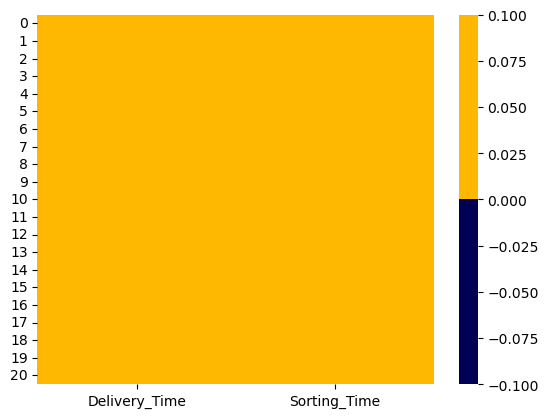

In [19]:
#to genrate heat map
import seaborn as sns
cols = df.columns
colors = ['#000055', '#ffb801']   #define colors, yellow for missing, blue for non missing
sns.heatmap(df[cols].isnull(),
               cmap= sns.color_palette(colors))

Hence we can conclude no missing values

In [13]:
#to check for duplicate rows
df[df.duplicated()].shape

(0, 2)

No duplicate rows

In [14]:
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9bfb4f8f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9bfb4fd9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9bfb4f89d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9bfb5044d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9bfb504a10>],
 'means': []}

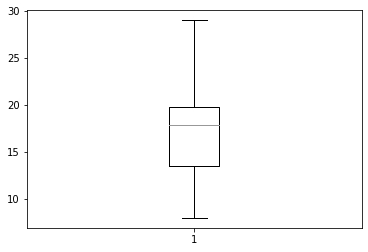

In [15]:
#Outlier Detection
import matplotlib.pyplot as plt
plt.boxplot(df['Delivery_Time'])

C:\Users\BIS\AppData\Local\Temp\ipykernel_5208\3822119211.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Delivery_Time)


<Axes: xlabel='Delivery_Time', ylabel='Density'>

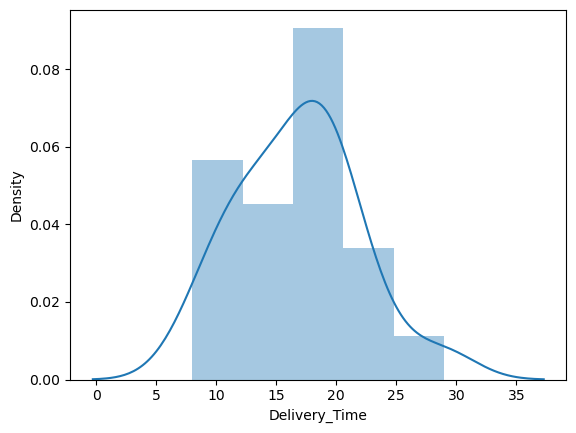

In [20]:
sns.distplot(df.Delivery_Time)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9bfb3abad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9bfb3b2590>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9bfb3ab550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9bfb3b9090>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9bfb3b95d0>],
 'means': []}

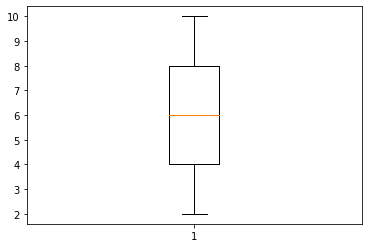

In [18]:
plt.boxplot(df['Sorting_Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


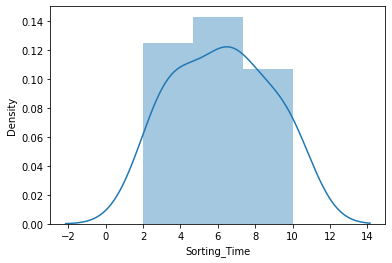

In [19]:
sns.distplot(df.Sorting_Time)

Here, we can coclude there are no outliers.

**- Performing Transformation on each column**

In [1]:
import numpy as np

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


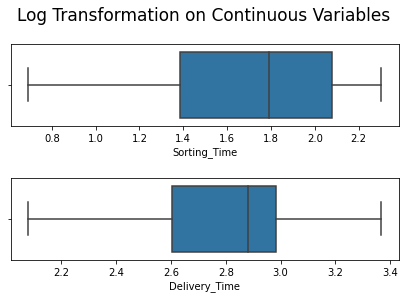

In [60]:
fig, ax=plt.subplots(2, figsize=(6,4), sharex= False, sharey = False)
sns.boxplot(np.log(df.Sorting_Time), ax=ax[0])
sns.boxplot(np.log(df.Delivery_Time), ax=ax[1])
plt.suptitle("Log Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


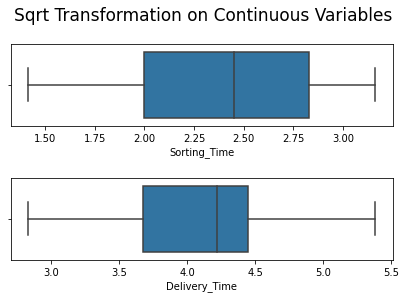

In [58]:
fig, ax=plt.subplots(2, figsize=(6,4), sharex= False, sharey = False)
sns.boxplot(np.sqrt(df.Sorting_Time), ax=ax[0])
sns.boxplot(np.sqrt(df.Delivery_Time), ax=ax[1])
plt.suptitle("Sqrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


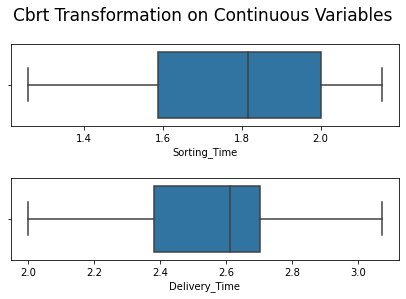

In [59]:
fig, ax=plt.subplots(2, figsize=(6,4), sharex= False, sharey = False)
sns.boxplot(np.cbrt(df.Sorting_Time), ax=ax[0])
sns.boxplot(np.cbrt(df.Delivery_Time), ax=ax[1])
plt.suptitle("Cbrt Transformation on Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

**Correlation**

In [31]:
#Correlation coef
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


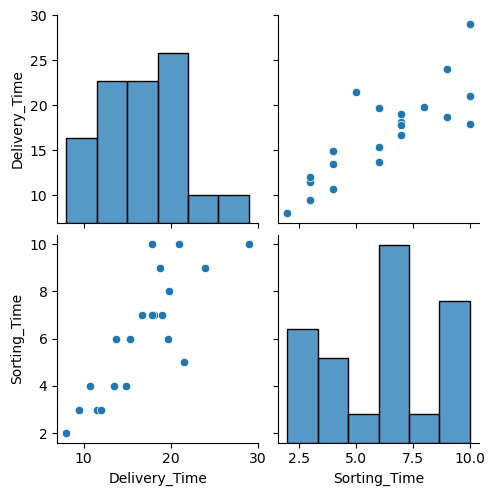

In [24]:
sns.pairplot(df)

***Fitting a Regression Equation***

In [22]:
import statsmodels.formula.api as smf

In [23]:
model = smf.ols("Delivery_Time~Sorting_Time", data=df).fit()

In [35]:
#model parameters
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [36]:
#get t-values & p-values
print(model.tvalues, '\n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [37]:
#r squared value
model.rsquared

0.6822714748417231

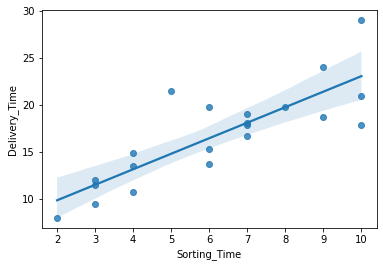

In [38]:
sns.regplot(x = "Sorting_Time", y = "Delivery_Time", data = df)

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           3.98e-06
Time:                        14:08:46   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Residual Analysis***

***Test for Noramlity of Residual through QQ plot***

In [40]:
import statsmodels.api as sm

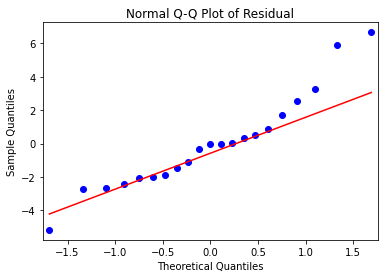

In [41]:
#q line is the 45 degrees line
qqplot = sm.qqplot(model.resid, line= 'q')
plt.title('Normal Q-Q Plot of Residual')
plt.show()

In [42]:
import numpy as np
list(np.where(model.resid>6))

[array([20])]

***Residual plot for Homoscedasticity***

In [43]:
def get_standardize_values( vals): 
  return (vals - vals.mean())/vals.std() # get standardized values of fitted values and residual

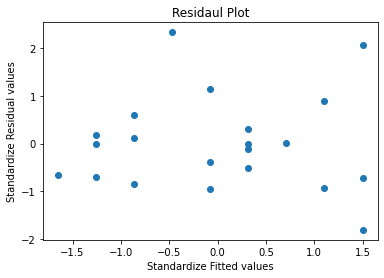

In [44]:
plt.scatter(get_standardize_values(model.fittedvalues), get_standardize_values(model.resid))
plt.ylabel('Standardize Residual values')
plt.xlabel('Standardize Fitted values')
plt.title('Residaul Plot')
plt.show()

***Residual vs Regressors***

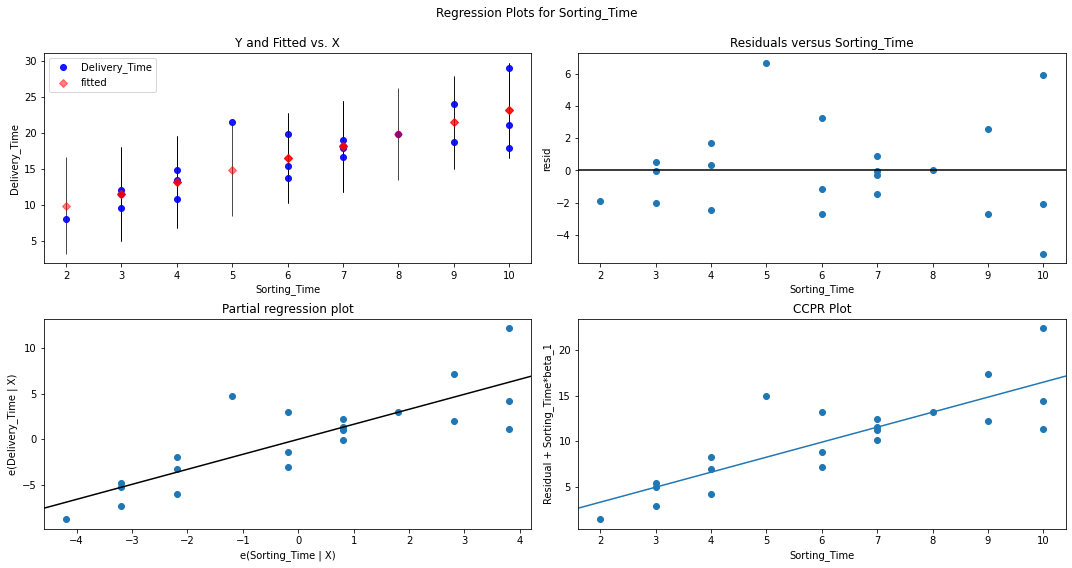

In [45]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Sorting_Time", fig=fig)
plt.show()

***Model Deletion by Cook's Distance and Leverage value***

In [46]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


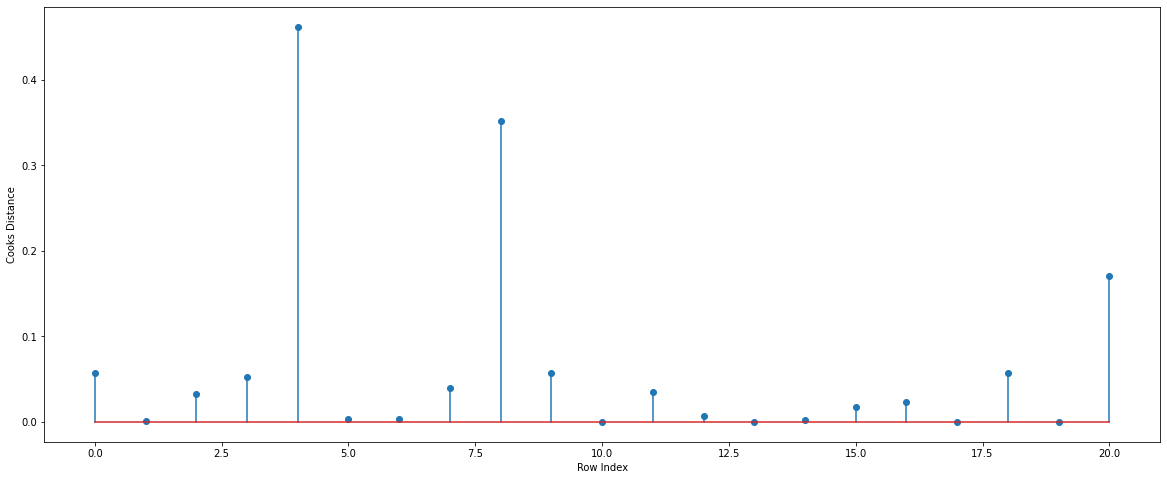

In [47]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(df)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [48]:
#index and values of influencers where c is more than .5
(np.argmax(c), np.max(c))

(4, 0.462053041265031)

In [49]:
from statsmodels.graphics.regressionplots import influence_plot


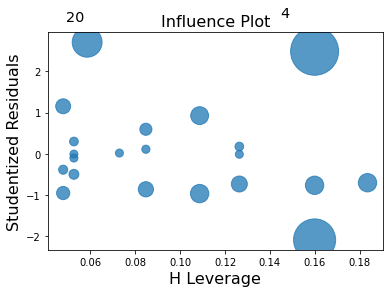

In [50]:
influence_plot(model)
plt.show()

In [51]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*(k+1)/n

In [52]:
leverage_cutoff

0.42857142857142855

From the above plots, as C<1 & leverage_cutoff value is higher than any datapoint, hence we will not delete any datapoint.

***Prediction***

In [53]:
#Predict Delivery Time for Sorting Time = 5, 10
newdata = pd.Series([5,10])

In [54]:
data_pred = pd.DataFrame(newdata, columns = ['Sorting_Time'])

In [55]:
data_pred

,Sorting_Time
0,5
1,10


In [56]:
model.predict(data_pred)

0    14.827833
1    23.072933
dtype: float64